In [ ]:
import os
import torch
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Deep_learning_course/Airplane_location/Two_bounding_box/src/')
from data_loading import YoloDataset
from data_loading_test import YoloDatasetTest
# from yolo_model_4 import YoloModel
from yolo_model_2 import Yolov1
# from iou_giou import intersection_over_union, generalized_intersection_over_union
from Utils import BoxPlotter

### Import data to local path

In [ ]:
path_to_zip_folder = '/content/drive/MyDrive/Deep_learning_course/Airplane_location/data/airplanes.zip'
current_folder_path = '/content/localdata/'
!unzip -q $path_to_zip_folder -d $current_folder_path

In [ ]:
path_to_zip_folder = '/content/drive/MyDrive/Deep_learning_course/Airplane_location/data/airplanes_test.zip'
current_folder_path = '/content/localdata/'
!unzip -q $path_to_zip_folder -d $current_folder_path

### Define parameters

In [ ]:
# data
root_dir = '/content/drive/MyDrive/Deep_learning_course/Airplane_location/Two_bounding_box/'
data_path = os.path.join(current_folder_path, 'dataset/')
data_test_path = os.path.join(current_folder_path, 'airplanes_test/')
batch_size = 150
workers = 8
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
random_seed = 42
# model
grid_side = 4
path_load = os.path.join(root_dir, 'models/')
name_model = 'yolo_model_resnet_2.pkl'

In [ ]:
data_train_samples = YoloDataset(
    data_path,
    resize_size=(224, 224),
    S=grid_side,
)

In [ ]:
model = Yolov1(split_size=4, num_boxes=2, num_classes=0)
state_dict = torch.load(
    os.path.join(path_load, name_model),
    map_location=torch.device('cpu')
)
model.load_state_dict(state_dict["model"])
model = model.to(device)

In [ ]:
# model = YoloModel(grid_size=grid_side)
# state_dict = torch.load(
#     os.path.join(path_load, name_model),
#     map_location=torch.device('cpu')
# )
# model.load_state_dict(state_dict["model"])
# model = model.to(device)

### Show images from training dataset

In [ ]:
plotter_pretrained = BoxPlotter(
    model=model,
    data=data_train_samples,
    threshold=0.4,
    grid_size=grid_side,
    resize_size=(400, 200),
    device=device
)

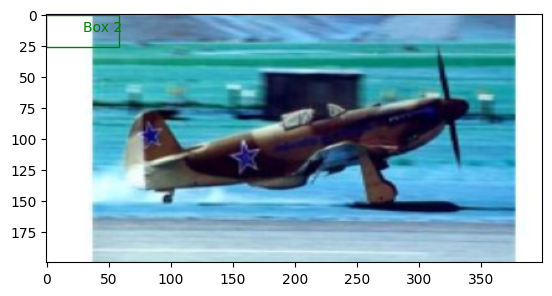

In [ ]:
plotter_pretrained.plot(111)

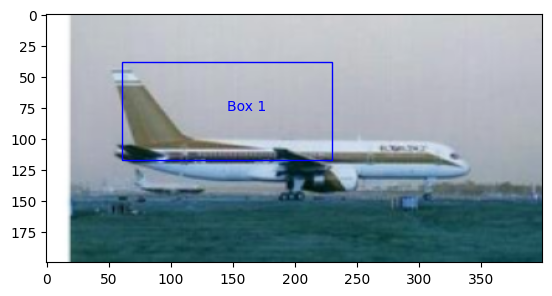

In [ ]:
plotter_pretrained.plot(200)

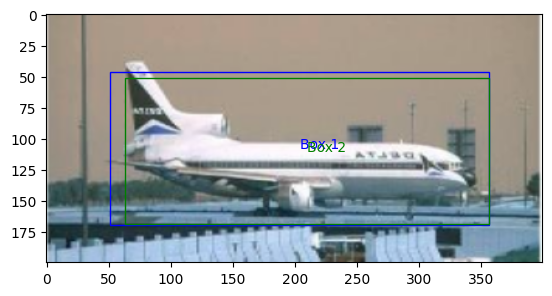

In [ ]:
plotter_pretrained.plot(444)

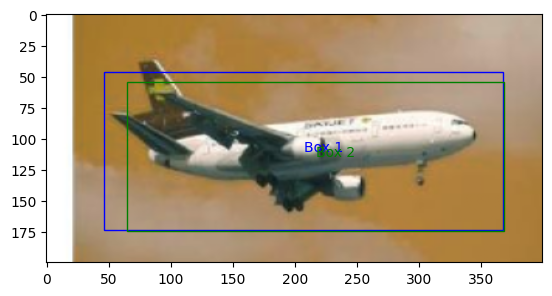

In [ ]:
plotter_pretrained.plot(666)

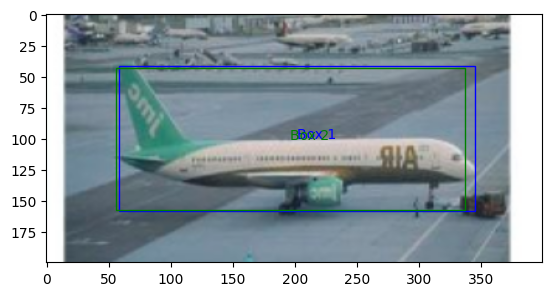

In [ ]:
plotter_pretrained.plot(777)

### Show images from test dataset

In [ ]:
data_test = YoloDatasetTest(
    data_test_path,
    resize_size=(224, 224),
)

In [ ]:
plotter_test = BoxPlotter(
    model=model,
    data=data_test,
    threshold=0.3,
    grid_size=grid_side,
    resize_size=(400, 200),
    device=device
)

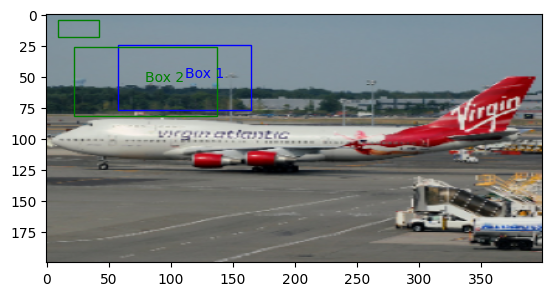

In [ ]:
plotter_test.plot(0)

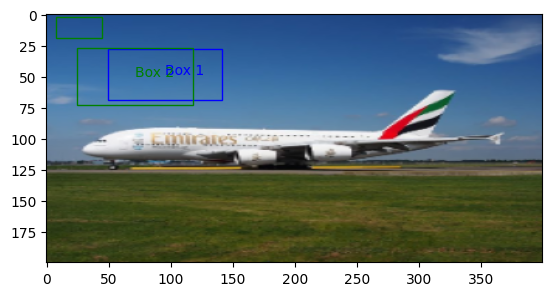

In [ ]:
plotter_test.plot(1)

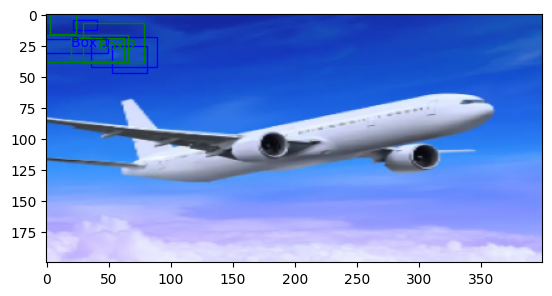

In [ ]:
plotter_test.plot(2)

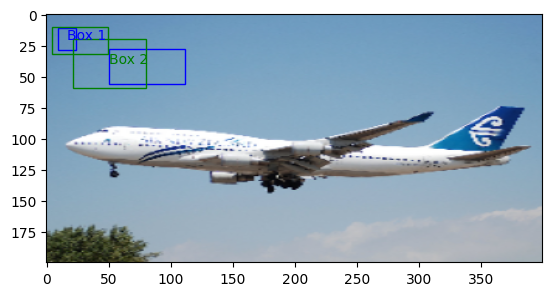

In [ ]:
plotter_test.plot(3)

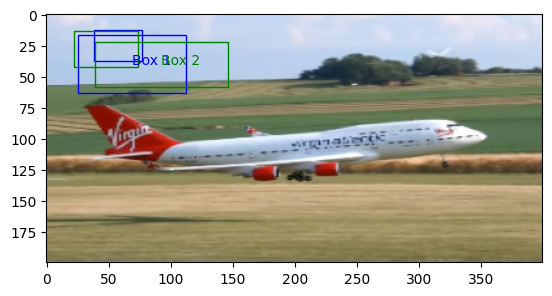

In [ ]:
plotter_test.plot(4)

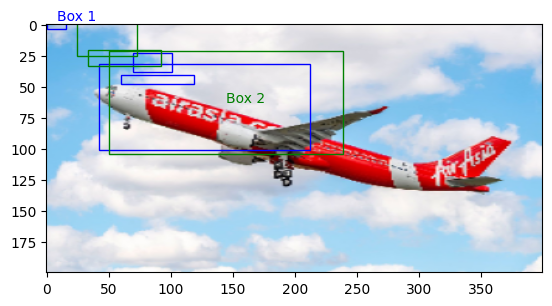

In [ ]:
plotter_test.plot(5)

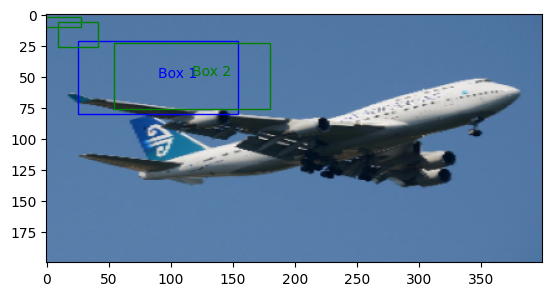

In [ ]:
plotter_test.plot(6)

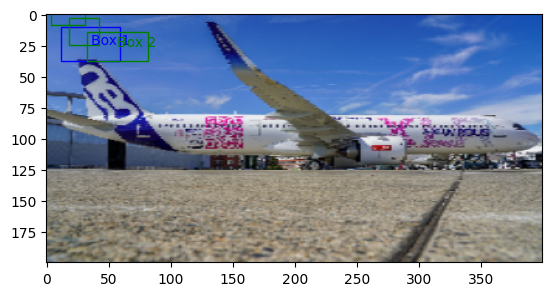

In [ ]:
plotter_test.plot(7)

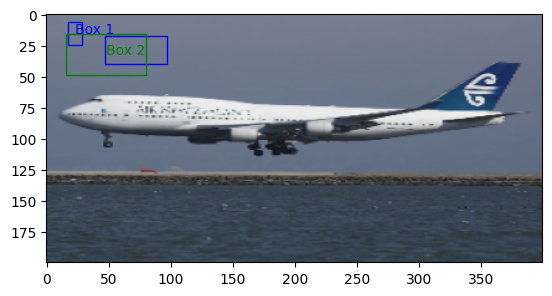

In [ ]:
plotter_test.plot(8)

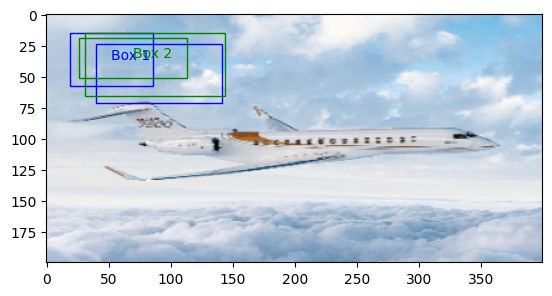

In [ ]:
plotter_test.plot(9)

### Training metrics

In [ ]:
state_dict.keys()

dict_keys(['model', 'optimizer', 'loss_history', 'metric_history', 'val_loss_history', 'val_metric_history'])

In [ ]:
state_dict["metric_history"].keys()

dict_keys(['iou_yolo_max_box'])

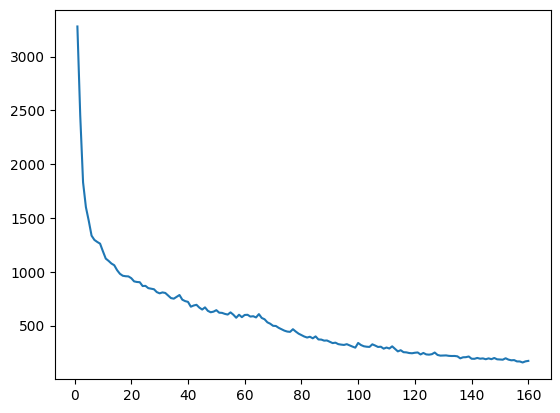

In [ ]:
plt.plot(state_dict["loss_history"])

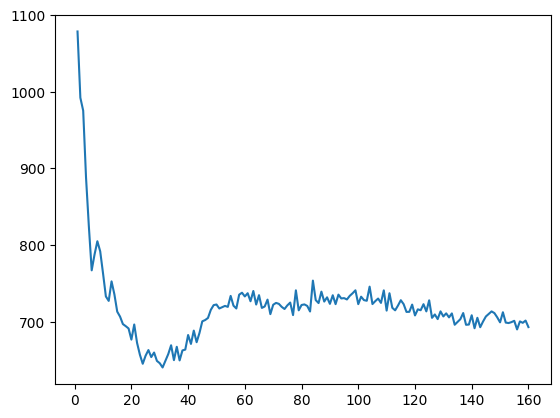

In [ ]:
plt.plot(state_dict["val_loss_history"])

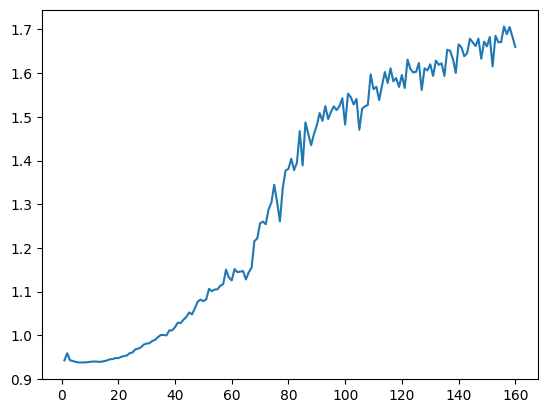

In [ ]:
plt.plot(state_dict["metric_history"]['iou_yolo_max_box'])

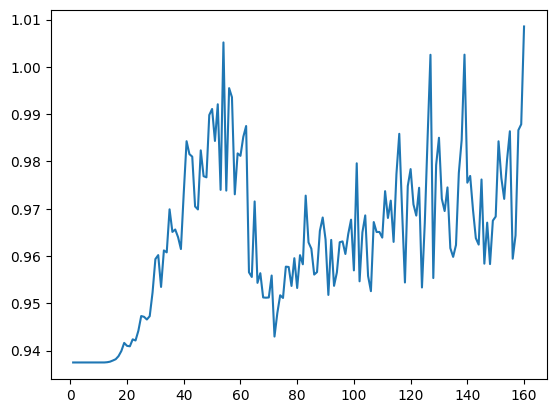

In [ ]:
plt.plot(state_dict["val_metric_history"]['iou_yolo_max_box'])